# Building a Computer Vision Model to identify pizza and steak
Links:
- [pizza_steak](https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip) 
- [10_food_classes_all_data](https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip)

In [3]:
# Understand the dataset 
# Walk through the pizza_steak directory and list number of files
import os
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [5]:
!ls pizza_steak/train/steak

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
1081258.jpg
1090122.jpg
1093966.jpg
1098844.jpg
1100074.jpg
1105280.jpg
1117936.jpg
1126126.jpg
114601.jpg
1147047.jpg
1147883.jpg
1155665.jpg
1163977.jpg
1190233.jpg
1208405.jpg
1209120.jpg
1212161.jpg
1213988.jpg
1219039.jpg
1225762.jpg
1230968.jpg
1236155.jpg
1241193.jpg
1248337.jpg
1257104.jpg
126345.jpg
1264050.jpg
1264154.jpg
1264858.jpg
127029.jpg
1289900.jpg
1290362.jpg
1295457.jpg
1312841.jpg
1313316.jpg
1324791.jpg
1327567.jpg
1327667.jpg
1333055.jpg
1334054.jpg
1335556.jpg
1337814.jpg
1340977.jpg
1343209.jpg
134369.jpg
1344105.jpg
134598.jpg
1346387.jpg
1348047.jpg
1351372.jpg
1362989.jpg
1367035.jpg
1371177.jpg
1375640.jpg
1382427.jpg
1392718.jpg
1395906.jpg
1400760.jpg
1403005.jpg
1404770.jpg
140832.jpg
141056.jpg
141135.jpg
1413972.jpg
1421393.jpg
1428947.jpg
1433912.jpg
143490.jpg
1445352.jpg
1446401.jpg
1453991.jpg
1456841.jpg
146833.jpg
1476404.jpg
148508

To visualize our images, first get the class names programmatically

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
    # Set up the target directory and images from there
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}")

    return img

['1608000.jpg']
Image shape: (512, 512, 3)


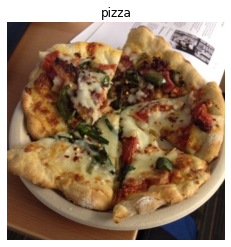

In [8]:
# View a ranomd image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 31,  32,  50],
        [ 29,  30,  48],
        [ 27,  28,  46],
        ...,
        [227, 223, 224],
        [248, 244, 245],
        [251, 247, 248]],

       [[ 28,  29,  47],
        [ 29,  30,  48],
        [ 29,  30,  48],
        ...,
        [230, 226, 227],
        [251, 247, 248],
        [255, 251, 252]],

       [[ 27,  28,  46],
        [ 30,  31,  49],
        [ 32,  33,  51],
        ...,
        [235, 233, 234],
        [252, 250, 251],
        [254, 252, 253]],

       ...,

       [[ 21,  16,  22],
        [ 21,  16,  22],
        [ 20,  15,  19],
        ...,
        [ 39,  28,  26],
        [ 46,  32,  31],
        [ 50,  36,  35]],

       [[ 18,  13,  19],
        [ 19,  14,  20],
        [ 19,  14,  18],
        ...,
        [ 42,  28,  27],
        [ 47,  32,  29],
        [ 49,  34,  31]],

       [[ 17,  12,  18],
        [ 18,  13,  19],
        [ 19,  14,  18],
        ...,
        [ 41,  27,  2

In [10]:
# View the image shape
img.shape # Returns the width, height, colour channels

(512, 512, 3)

## An end-to-end example 
Build a convolutional neural network to find patterns in the images:
- Load the images
- Preprocess the images
- Build a CNN to find patterns in our images
- Comile the CNN
- Fit the CNN to the training data

In [9]:
# Starting from scratch
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
#Set the seed 
tf.random.set_seed = 42

# Preprocessing data (rescale values between 0 & 1, standardizing)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to the data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, 
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (Same as the Tiny VGG architecture)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, 
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # Same as above
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["Accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 15s 289ms/step - loss: 0.5289 - Accuracy: 0.7420 - val_loss: 0.3770 - val_Accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 13s 275ms/step - loss: 0.4270 - Accuracy: 0.8140 - val_loss: 0.3557 - val_Accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 14s 301ms/step - loss: 0.4019 - Accuracy: 0.8247 - val_loss: 0.3511 - val_Accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 13s 277ms/step - loss: 0.3411 - Accuracy: 0.8587 - val_loss: 0.3502 - val_Accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 15s 315ms/step - loss: 0.2909 - Accuracy: 0.8907 - val_loss: 0.3069 - val_Accuracy: 0.8560


In [11]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [44]:
# Compare this model to the previous architectural structure in the previous notebook

# Set the seed
tf.random.set_seed = 42

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 158ms/step - loss: 20.0595 - accuracy: 0.5867 - val_loss: 30.8372 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 157ms/step - loss: 8.4022 - accuracy: 0.5767 - val_loss: 2.5659 - val_accuracy: 0.7020
Epoch 3/5
47/47 [==============================] - 7s 150ms/step - loss: 2.9049 - accuracy: 0.6753 - val_loss: 0.6736 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 8s 162ms/step - loss: 1.3002 - accuracy: 0.6740 - val_loss: 3.7958 - val_accuracy: 0.5140
Epoch 5/5
47/47 [==============================] - 7s 148ms/step - loss: 1.7092 - accuracy: 0.5980 - val_loss: 0.5869 - val_accuracy: 0.7560


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**NOTE:** Trainable parameters are patterns a model can learn from data. However, more parameters is not always better. As seen above, the first model had 31k trainable parameters, yet performed better than the 2nd one with 15 million parameters.
**A convolutional neural network seeks to sort out and learn the most important patterns.** Hence, even if there are less learnable parameters the CNN often better at deciphering distinct features of images

# Binary Classification Break Down:
1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepare it for the model e.g scaling/normalizing)
3. Create a Nidek (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until results are satisfactory

['440188.jpg']
Image shape: (382, 512, 3)
['3871666.jpg']
Image shape: (512, 512, 3)


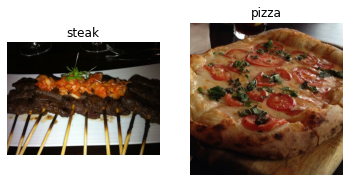

In [14]:
# Becoming one with the data (visualizing)
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [11]:
# Preprocess the data
# Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [16]:
# Turn the data into batches (32 is the recommended)
# Create train and test data generators and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Load image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory
                                               target_size=(224, 224), # Resizes the images
                                               class_mode="binary", # Type of data
                                               batch_size=32) # Batch size

# A validation data set can be set up usually as well

test_data = train_datagen.flow_from_directory(test_dir,
                                              (224,224),
                                              class_mode="binary",
                                              batch_size=32) # directory and target_size are the 1st 2 paras

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# # Get a sample of a train data batch
images, labels = train_data.next() # get the next batch of images and labels in train_data
len(images), len(labels)

(32, 32)

In [19]:
# How many batches are there?
len(train_data) # 1500 / 32 = 46.875 = 47

47

In [20]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [21]:
# View the first batch of labels
labels

array([0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.],
      dtype=float32)

In [22]:
# Create a baseline CNN model (simple model to kickstart the experiment and improve from it)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [23]:
# Create the model
# Strides and kernal_size are tuples but can be inputted as a simple integer
# Padding: if same the output is like the input, valid means output gets compressed
model_3 = Sequential([
    Conv2D(filters=10, # Sliding windows over an image (10,32,64 higher means more complex model)
    kernel_size=3,  # Determines the shape of the filter over the output (3,5,7 lower vals learn smaller features)
    strides=1, # Numer of steps a filter takes accross an image e.g 1 pixel at a time (1 or 2)
    padding="valid", # Pads the tensor with zeros to preserve input shape if "same" or lower shape if "valid"
    activation="relu",
    input_shape=(224, 224, 3)), # Input layer
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # Output layer
])

In [24]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 16s 322ms/step - loss: 2.1638 - accuracy: 0.6340 - val_loss: 0.5019 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 15s 321ms/step - loss: 0.4853 - accuracy: 0.7880 - val_loss: 0.3831 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 15s 317ms/step - loss: 0.3763 - accuracy: 0.8440 - val_loss: 0.3779 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 16s 343ms/step - loss: 0.2243 - accuracy: 0.9293 - val_loss: 0.3352 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 15s 312ms/step - loss: 0.1237 - accuracy: 0.9700 - val_loss: 0.3883 - val_accuracy: 0.8380


It is clear that the model is learning patterns well. However, the accuracy is lower than the first model since it is not complex enough.

<AxesSubplot:>

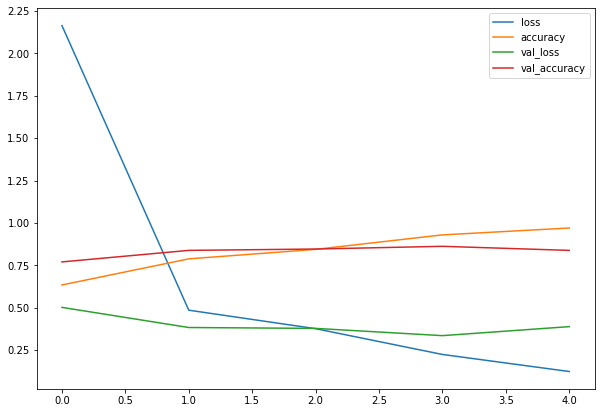

In [27]:
# Evaluate the model
import pandas as pd
pd.DataFrame(history_3.history).plot(figsize=(10,7))

In [12]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
    """ 
    Returns each history curve seperately
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure() # To create a new figure after creating the first one
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

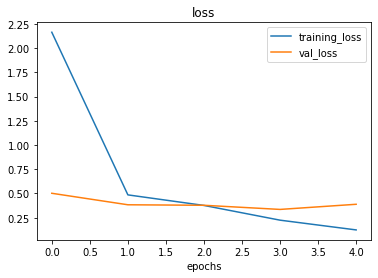

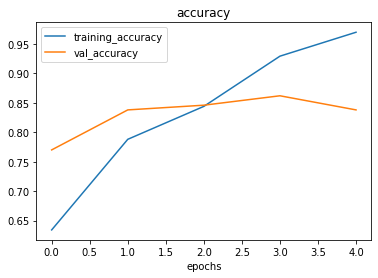

In [29]:
plot_loss_curves(history_3)

**Note:** When a model's validation loss starts to increase, it is likely that the model is overfitting towards the training dataset. 

### Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of the flattened layer

Reduce overfitting:
- Add data augumentation
- Add regularization layers (such as MaxPool2D)
- Add more data...etc

**NOTE:** Reducing overfitting is called regularization

In [30]:
# Create a new model
# NOTE: MaxPool simplifies the image by selecting the heighest value from a square grid to 1 square pos
model_4 = Sequential([
    Conv2D(10, 3, 1, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"), # stride is 1 by default so no need to add 1 
    MaxPool2D(), # default is 2 so no need to add 2
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [31]:
# Compile the data
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [32]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 291ms/step - loss: 0.5972 - accuracy: 0.6773 - val_loss: 0.4807 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 17s 357ms/step - loss: 0.4732 - accuracy: 0.7820 - val_loss: 0.3843 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 12s 253ms/step - loss: 0.4204 - accuracy: 0.8087 - val_loss: 0.3286 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3956 - accuracy: 0.8213 - val_loss: 0.3167 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3591 - accuracy: 0.8467 - val_loss: 0.2977 - val_accuracy: 0.8840


Notice that the accuracy is higher than the previous model of 81% and higher than the baseline of 85%. The amount of time the model took to fit was significantly less as well due to the max pooling of images.

Model 3 has 50x the parameters of model 4 and performs worse!

In [33]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6760)             

In [34]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


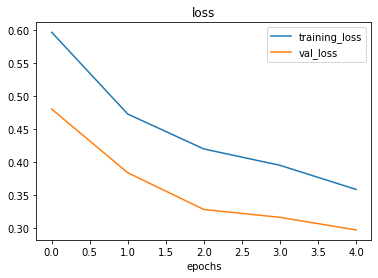

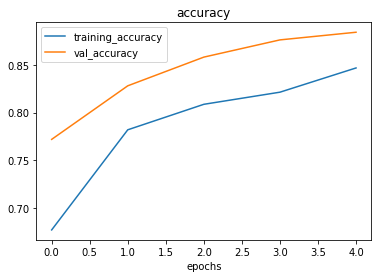

In [35]:
plot_loss_curves(history_4)

### Data Augumentation 

In [36]:
# Create ImageDataGenerator training with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data aug for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing models to learn more generalization.
This is done by forcing the model to find patterns with the original images being flipped, rotated, cut etc.

In [37]:
# Import data and augument it from the training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstation only
IMG_SIZE=(224, 224)
# Create non-augmented train data batches
print("Non-agumented train data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-agumented test data batches
print("Non-agumented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data
Found 1500 images belonging to 2 classes.
Non-agumented train data: 
Found 1500 images belonging to 2 classes.
Non-agumented test data: 
Found 500 images belonging to 2 classes.


Data agumentation is usually only performed on the training data. The ImageDataAgumentation() built-in parameters modifies the images when loaded, but leaves the original images as is.

In [38]:
# Get a sample data batch
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 27


<Figure size 432x288 with 0 Axes>

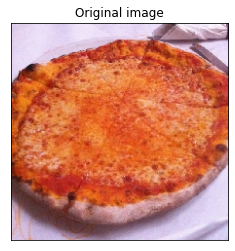

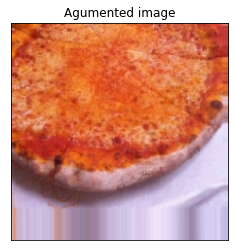

<Figure size 432x288 with 0 Axes>

In [39]:
random_number = random.randint(0,31)
print(f"showing image number: {random_number}")
img1 = plt.imshow(images[random_number])
plt.title(f"Original image")
img1.axes.xaxis.set_visible(False)
img1.axes.yaxis.set_visible(False)
plt.figure()

img2 = plt.imshow(augmented_images[random_number])
plt.title(f"Agumented image")
img2.axes.xaxis.set_visible(False)
img2.axes.yaxis.set_visible(False)
plt.figure()

In [40]:
# Create the model (same as model 4 except that the train data is augmented)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data_augmented, # Takes more time since it augments
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 555ms/step - loss: 0.7225 - accuracy: 0.4720 - val_loss: 0.6802 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 32s 680ms/step - loss: 0.6827 - accuracy: 0.5813 - val_loss: 0.6262 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 31s 643ms/step - loss: 0.6492 - accuracy: 0.6553 - val_loss: 0.5322 - val_accuracy: 0.7520
Epoch 4/5
47/47 [==============================] - 35s 721ms/step - loss: 0.6546 - accuracy: 0.6487 - val_loss: 0.5468 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 30s 631ms/step - loss: 0.6604 - accuracy: 0.6193 - val_loss: 0.5528 - val_accuracy: 0.7420


In [41]:
# The model performed poorly, but wait the data was not shuffled 
# during agumentation!
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)


Found 1500 images belonging to 2 classes.


In [42]:
# Rebuilding model 5 with the shuffled augmented data
# Create the model
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the data
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 523ms/step - loss: 0.6173 - accuracy: 0.6633 - val_loss: 0.4850 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 24s 518ms/step - loss: 0.5224 - accuracy: 0.7427 - val_loss: 0.4064 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 22s 458ms/step - loss: 0.5155 - accuracy: 0.7507 - val_loss: 0.3845 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 24s 506ms/step - loss: 0.4863 - accuracy: 0.7680 - val_loss: 0.3741 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 22s 454ms/step - loss: 0.4883 - accuracy: 0.7733 - val_loss: 0.3467 - val_accuracy: 0.8660


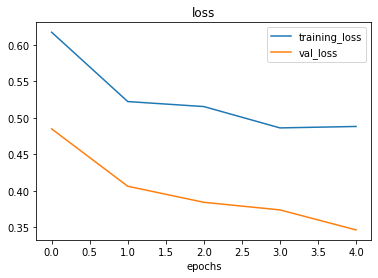

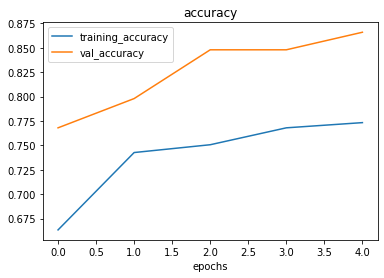

In [43]:
# Plot loss curves
# It got better by around 12%!!
plot_loss_curves(history_6)

**NOTE:** When shuffling training data, the model gets exposed to all different kinda of data while learning features.

### Repeat experimentation of the model until satisfied
- Increase the number of model layers
- Train for longer (more epochs)
- Find an ideal learning rate
- Get more data (give the model more opportunities to learn)
- Use **transfer learning** to leverage what another image model learnt

# Its time to make a prediction with the trained model with custom data

In [45]:
# Classes the model assess
print(class_names)

['pizza' 'steak']


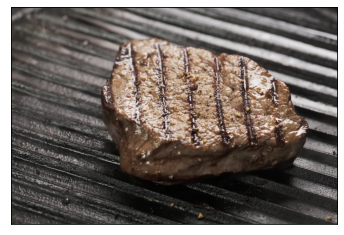

In [51]:
# View the example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

steak = mpimg.imread("./custom_data/pan-grilled-steak.webp")
steak_pic = plt.imshow(steak)
steak_pic.axes.xaxis.set_visible(False)
steak_pic.axes.yaxis.set_visible(False);

In [58]:
# Check the shape of the image
steak.shape

(640, 960, 3)

The image has to be preprocessed before being passed inside the model

In [30]:
# Create a function to import the image and resize it to use in the model
def load_prep_image(filename, img_shape=224):
    """ 
    Reads the filename, turns it into a tensor and reshapes it
    to (img_shape, img_shape, color_channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)

    # Decode the file to a tensor
    img = tf.image.decode_image(img)
    
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image (get all the values between 0 and 1)
    img = img/255
    
    return img

In [80]:
!ls ./custom_data

pan-grilled-steak.jpg


In [83]:
custom_steak = load_prep_image("./custom_data/pan-grilled-steak.jpg")
custom_steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.20234093, 0.19841936, 0.18273309],
        [0.20810325, 0.20418169, 0.18849541],
        [0.20386155, 0.19993998, 0.18425371],
        ...,
        [0.1343938 , 0.13047223, 0.11478595],
        [0.15126023, 0.14733866, 0.13165238],
        [0.20560193, 0.20168036, 0.18599409]],

       [[0.2120448 , 0.20812324, 0.19243696],
        [0.21490596, 0.2109844 , 0.19529812],
        [0.20784314, 0.20392157, 0.1882353 ],
        ...,
        [0.13249299, 0.12857142, 0.11288515],
        [0.13053215, 0.12661058, 0.1109243 ],
        [0.1490393 , 0.14511773, 0.12943146]],

       [[0.21982794, 0.21590637, 0.20022008],
        [0.22895157, 0.22503   , 0.20934373],
        [0.232493  , 0.22857143, 0.21288516],
        ...,
        [0.13809527, 0.1341737 , 0.11848743],
        [0.12567022, 0.12174866, 0.10606238],
        [0.11814722, 0.11422565, 0.09853937]],

       ...,

       [[0.3330133 , 0.32909173, 0.31340545],
        [0.21

In [85]:
model_6.predict(tf.expand_dims(custom_steak, axis=0))

array([[0.6240967]], dtype=float32)

In [88]:
# Convert the probability to the correct class (0.5+ is steak)
# Index the prediction by rounding the predicted probability
pred_class = class_names[int(tf.round(0.6))]
pred_class

'steak'

In [25]:
def pred_plot(model, filename, class_names):
    """ 
    Imports and image located at filename, makes a prediction with
    model and imports the class_names to label it
    """
    # Import the target image and preprocess it
    img = load_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    pimg = plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    pimg.axes.xaxis.set_visible(False)
    pimg.axes.yaxis.set_visible(False);

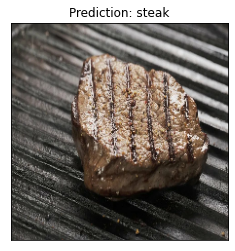

In [90]:
# Test the model on a custom image:
pred_plot(model_6, "./custom_data/pan-grilled-steak.jpg", class_names)

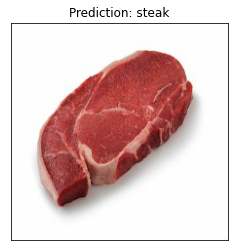

In [92]:
pred_plot(model_6, "./custom_data/steak2.jpg", class_names)

# Multi-class Image Classification
1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters to improve
7. Repeat till satisfied

In [13]:
## Import and become one with the data
train_dir2 = "10_food_classes_all_data/train/"
test_dir2 = "10_food_classes_all_data/test/"

In [14]:
# Let's get the class names
import pathlib
import numpy as np 
data_dir = pathlib.Path(train_dir2)
class_names2 = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names2

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

['3482107.jpg']
Image shape: (512, 384, 3)


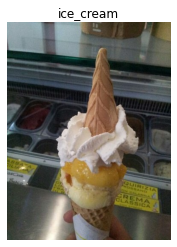

In [15]:
# Visualize 
# Do not forget to end ur dir with /
import random
img = view_random_image(target_dir=train_dir2,
                        target_class = random.choice(class_names2))

### Preprocess the data


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale 
train_datagen2 = ImageDataGenerator(rescale=1/255)
test_datagen2 = ImageDataGenerator(rescale=1/255)

# Load data in from directories and turn it into batches
train_data2 = train_datagen2.flow_from_directory(train_dir2,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode="categorical")  # This is the default no need to change actually

test_data2 = test_datagen2.flow_from_directory(test_dir2,
                                               target_size=(224, 224),
                                               batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a baseline and test the model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [20]:
# Create a model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3),
    MaxPool2D(),
    Conv2D(10, 3),
    Conv2D(10, 3),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # Changed to 10 since 10 different types and softmax (from sigmoid)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data2,
                        epochs=5,
                        steps_per_epoch=len(train_data2),
                        validation_data=test_data2,
                        validation_steps=len(test_data2))

Epoch 1/5
235/235 [==============================] - 101s 426ms/step - loss: 2.0709 - accuracy: 0.2559 - val_loss: 1.8858 - val_accuracy: 0.3184
Epoch 2/5
235/235 [==============================] - 102s 432ms/step - loss: 1.8113 - accuracy: 0.3789 - val_loss: 1.8766 - val_accuracy: 0.3468
Epoch 3/5
235/235 [==============================] - 78s 332ms/step - loss: 1.6144 - accuracy: 0.4580 - val_loss: 1.8793 - val_accuracy: 0.3456
Epoch 4/5
235/235 [==============================] - 76s 322ms/step - loss: 1.3536 - accuracy: 0.5543 - val_loss: 2.0451 - val_accuracy: 0.3252
Epoch 5/5
235/235 [==============================] - 71s 302ms/step - loss: 1.0536 - accuracy: 0.6537 - val_loss: 2.2142 - val_accuracy: 0.3448


### Evaluate the model

79/79 [==============================] - 8s 95ms/step - loss: 2.2142 - accuracy: 0.3448


([2.214226245880127, 0.3447999954223633], None)

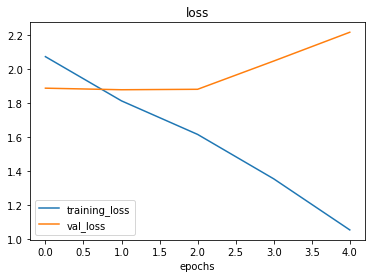

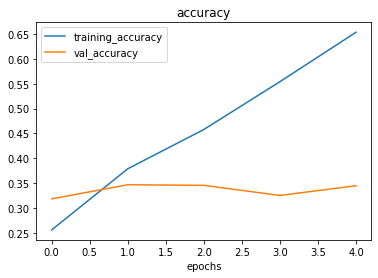

In [21]:
model_7.evaluate(test_data2), plot_loss_curves(history=history_7)

In [22]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 10)        9

The model appears to be overfitting.
Time to adjust the model by:
- Getting more data
- Data Agumentation
- Simplify the model
- Use transfer learning

In [23]:
# Recreate model 7 with data agumentation
train_datagen2_augmented = ImageDataGenerator(rescale=1/225,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

train_data2_augmented = train_datagen2_augmented.flow_from_directory(train_dir2,
                                                                    target_size=(224, 224),
                                                                    batch_size=32)

Found 7500 images belonging to 10 classes.


In [24]:
# Create model 8
# In this case it only copies the hyper parameters without keeping the learnt patterns
model_8 = tf.keras.models.clone_model(model_7)

# Compile the cloned model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data2_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data2_augmented),
                        validation_data=test_data2,
                        validation_steps=len(test_data2))

Epoch 1/5
235/235 [==============================] - 117s 494ms/step - loss: 2.1773 - accuracy: 0.2036 - val_loss: 2.0808 - val_accuracy: 0.2472
Epoch 2/5
235/235 [==============================] - 113s 482ms/step - loss: 2.0950 - accuracy: 0.2548 - val_loss: 2.0047 - val_accuracy: 0.2916
Epoch 3/5
235/235 [==============================] - 113s 480ms/step - loss: 2.0601 - accuracy: 0.2763 - val_loss: 1.9238 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 113s 482ms/step - loss: 2.0294 - accuracy: 0.2821 - val_loss: 1.9155 - val_accuracy: 0.3244
Epoch 5/5
235/235 [==============================] - 119s 504ms/step - loss: 2.0030 - accuracy: 0.2983 - val_loss: 1.8916 - val_accuracy: 0.3392


79/79 [==============================] - 8s 97ms/step - loss: 1.8916 - accuracy: 0.3392


([1.891554355621338, 0.3391999900341034], None)

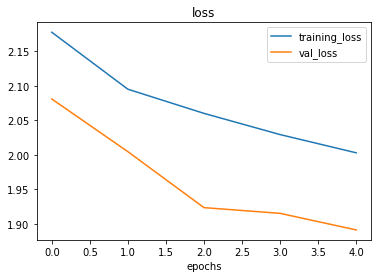

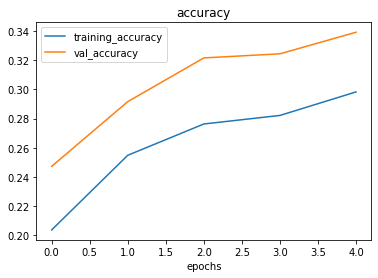

In [26]:
model_8.evaluate(test_data2), plot_loss_curves(history_8)

Not much of an improvement but the directionality seems to be correct now

### Repeat until satisfied

Make a prediction with the model_8 using some custom data 

In [34]:
# Reconfig pred_plot to work with multiclass prediction
def pred_plot(model, filename, class_names):
    """ 
    Imports and image located at filename, makes a prediction with
    model and imports the class_names to label it
    """
    # Import the target image and preprocess it
    img = load_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Add logic for multi-class:
    if len(pred[0] > 1):
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    pimg = plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    pimg.axes.xaxis.set_visible(False)
    pimg.axes.yaxis.set_visible(False);

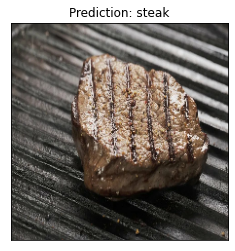

In [35]:
# Make a prediction with the model_8
pred_plot(model=model_8,
          filename="./custom_data/pan-grilled-steak.jpg",
          class_names=class_names2)

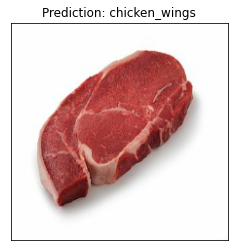

In [36]:
pred_plot(model=model_8,
          filename="./custom_data/steak2.jpg",
          class_names=class_names2)

In [37]:
# Saving and loading the model
model_8.save("saved_trained_model_8")

INFO:tensorflow:Assets written to: saved_trained_model_8\assets


In [39]:
!ls

03_Computer_Vision_With_TensorFlow.ipynb
10_food_classes_all_data
custom_data
pizza_steak
saved_trained_model_8


In [42]:
# Load in the trained model and evaluate it
loaded_model_8 = tf.keras.models.load_model("./saved_trained_model_8")
loaded_model_8.evaluate(test_data2)

79/79 [==============================] - 8s 95ms/step - loss: 1.8916 - accuracy: 0.3392


[1.891554832458496, 0.3391999900341034]

In [43]:
# They clearly are the same model and the loss is slightly different
model_8.evaluate(test_data2)

79/79 [==============================] - 8s 95ms/step - loss: 1.8916 - accuracy: 0.3392


[1.8915547132492065, 0.3391999900341034]